In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

excelnya = "Canada 2.xlsx"
df_can = pd.read_excel(excelnya,
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [2]:
df_can.head(1)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         195 non-null    object 
 1   Coverage     195 non-null    object 
 2   OdName       195 non-null    object 
 3   AREA         195 non-null    int64  
 4   AreaName     195 non-null    object 
 5   REG          195 non-null    int64  
 6   RegName      195 non-null    object 
 7   DEV          195 non-null    int64  
 8   DevName      195 non-null    object 
 9   1980         195 non-null    int64  
 10  1981         195 non-null    int64  
 11  1982         195 non-null    int64  
 12  1983         195 non-null    int64  
 13  1984         195 non-null    int64  
 14  1985         195 non-null    int64  
 15  1986         195 non-null    int64  
 16  1987         195 non-null    int64  
 17  1988         195 non-null    int64  
 18  1989         195 non-null    int64  
 19  1990    

In [4]:
print(df_can.shape)

(195, 51)


In [5]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2010)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 47)


In [6]:
df_can.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [7]:
#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

print('Matplotlib version : ',mpl.__version__)

Matplotlib version :  3.3.4


In [8]:
df_can_2 = pd.DataFrame(df_can,columns=['Continent',  'Total'])
df_can_2

,Continent,Total
Country,,
Afghanistan,Asia,58639.0
Albania,Europe,15699.0
Algeria,Africa,69439.0
American Samoa,Oceania,6.0
Andorra,Europe,15.0
Angola,Africa,2113.0
Antigua and Barbuda,Latin America and the Caribbean,981.0
Argentina,Latin America and the Caribbean,19596.0
Armenia,Asia,3310.0


In [9]:
df_dsn = df_can.loc[['Afghanistan', 'Australia', 'Argentina', 'Albania', 'Brazil'], :]

df_dsn

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Australia,Immigrants,Oceania,Australia and New Zealand,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23829.0
Argentina,Immigrants,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19596.0
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Brazil,Immigrants,Latin America and the Caribbean,South America,Developing regions,211,220,192,139,145,130,205,244,394,650,650,877,1066,866,566,572,586,591,531,626,845,847,745,839,917,969,1181,1746,2138,2509,2598,1508,1642,1714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29659.0


<h1>WAFFLE</h1>

In [10]:
df_dsn_sum = df_dsn['1980']

total_values = sum(df_dsn_sum)
category_proportions = [(float(value) / total_values) 
                        for value in df_dsn_sum]


#print out
for i, proportion_PPP in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ':'+ str(proportion_PPP))
    
    
print('=================')
    
df_dsn_sum_1 = df_dsn['Total']

total_values_1 = sum(df_dsn_sum_1)
category_proportions_1 = [(float(value_1) / total_values_1) 
                        for value_1 in df_dsn_sum_1]


#print out
for i, proportion_PPP_1 in enumerate(category_proportions_1):
    print(df_dsn.index.values[i] + ':'+ str(proportion_PPP_1))
    

Afghanistan:0.012326656394453005
Australia:0.5408320493066255
Argentina:0.2835130970724191
Albania:0.0007704160246533128
Brazil:0.162557781201849
Afghanistan:0.3977628847797479
Australia:0.16163801874889772
Argentina:0.13292452958174492
Albania:0.10649021177300538
Brazil:0.20118435511660404


In [11]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [12]:
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category

tiles_per_category

for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))



Afghanistan: 5
Australia: 216
Argentina: 113
Albania: 0
Brazil: 65


In [13]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')


Waffle chart populated!


In [14]:
waffle_chart

array([[1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 5., 5., 5., 5., 5., 5.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 5., 5., 5., 5., 5., 5.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 5., 5., 5., 5., 5., 5.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 5., 5., 5., 5., 5., 5.],
       [1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 4., 5., 5., 5., 5., 5., 5.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
   

<Figure size 432x288 with 0 Axes>

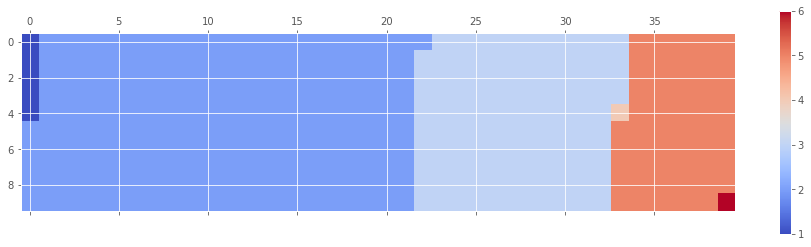

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

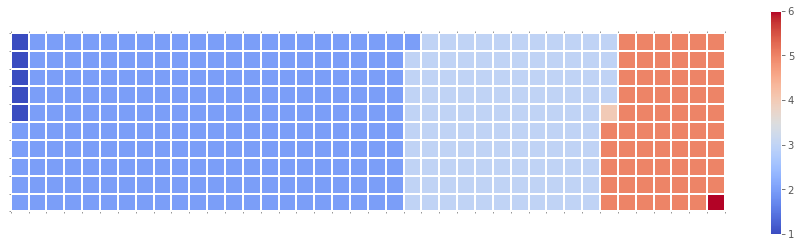

In [16]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

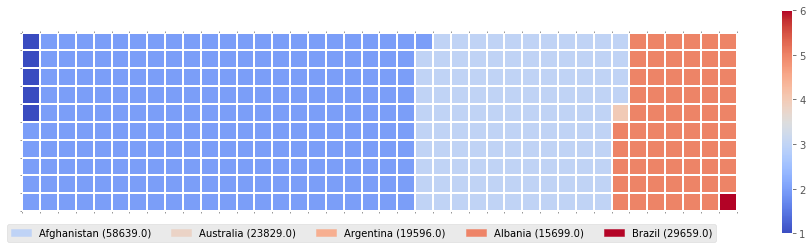

In [17]:

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [18]:
### test module

import package.waffle as wf  
import package.mod1 as mod1  

mod1.foo()

ini fungsi = [mod1] foo()


Total number of tiles is 400
Afghanistan: 5
Australia: 216
Argentina: 113
Albania: 0
Brazil: 65


<Figure size 432x288 with 0 Axes>

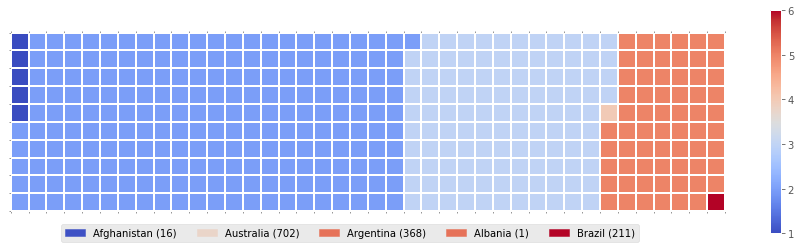

In [19]:
width = 40 # width of chart
height = 10 # height of chart
    
categories = df_dsn.index.values # categories
values = df_dsn_sum # correponding values of categories

colormap = plt.cm.coolwarm # color map class

wf.create_waffle_chart(df_dsn, categories, values, height, width, colormap)


<h1>Word CLOUD</h1>

In [20]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

novel = 'novel.txt'
alice_novel = open('novel.txt', 'r').read()

print ('File saved!')

Wordcloud is installed and imported!
File saved!


In [21]:
stopwords = set(STOPWORDS)
alice_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

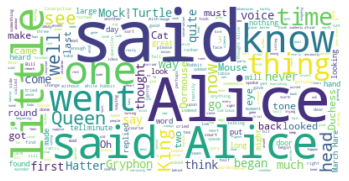

In [22]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

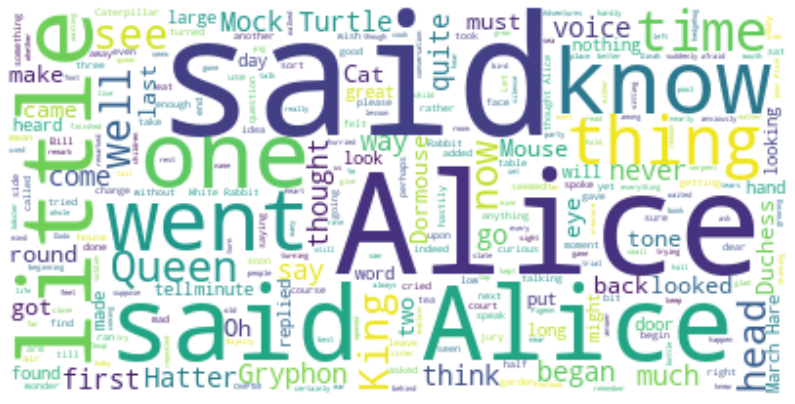

In [23]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

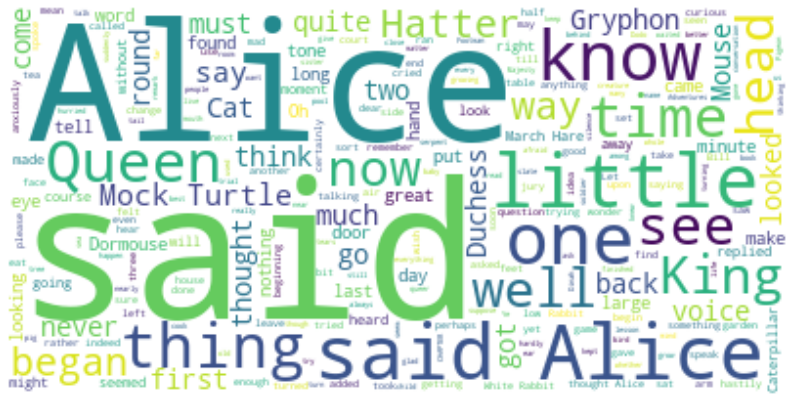

In [24]:

stopwords.add('went') 
# add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
foto = 'alice_mask.png'
insta = 'insta.png'
alice_mask = np.array(Image.open(foto))

insta_mask = np.array(Image.open(insta))
#alice_mask
insta_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

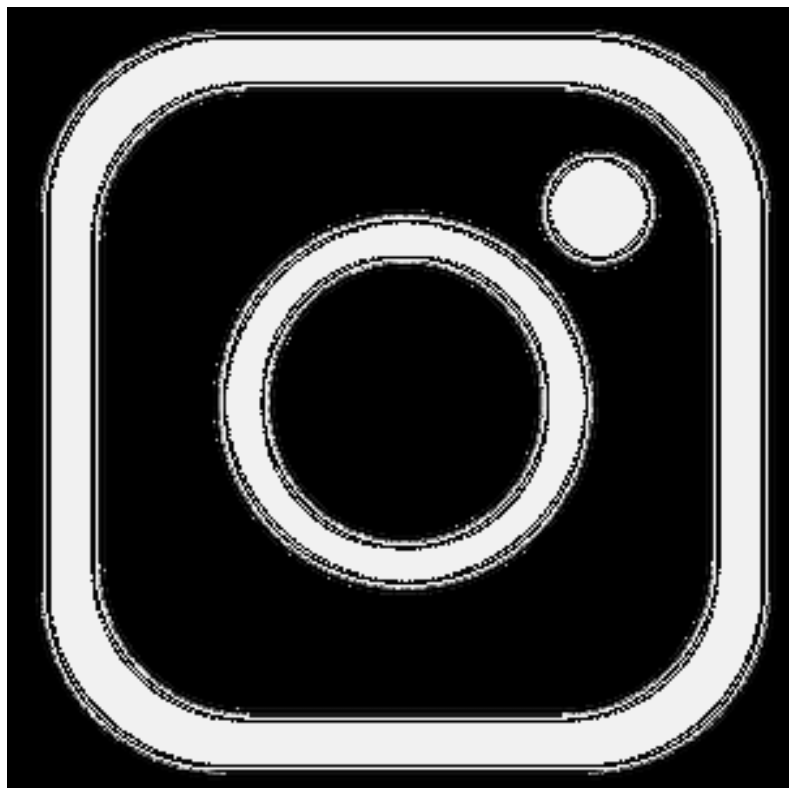

In [29]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(insta_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

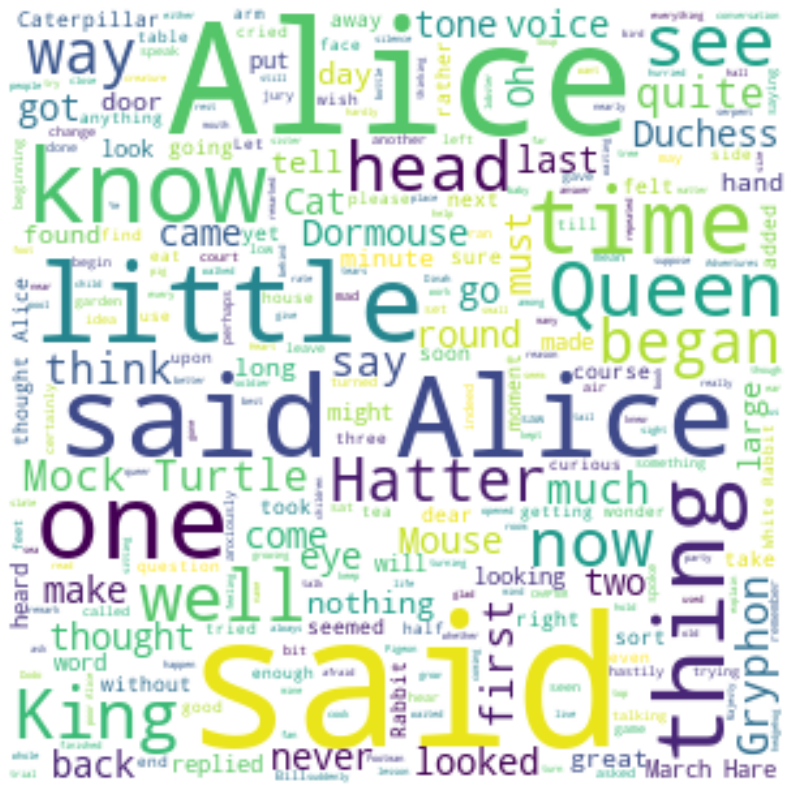

In [30]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', 
                     max_words=2000, 
                     mask=insta_mask, 
                     stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
df_can.head()

,Type,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Immigrants,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Immigrants,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Immigrants,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Immigrants,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [32]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [33]:
max_words = 200
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'Afghanistan Algeria Algeria Bangladesh Bangladesh China China China China China China China China China China China China China China China China China China China China Colombia Colombia Egypt Egypt Ethiopia France France France Germany Guyana Guyana Haiti Haiti India India India India India India India India India India India India India India India India India India India India India Iraq Iraq Israel Israel Jamaica Jamaica Jamaica Jordan Lebanon Lebanon Lebanon Mexico Morocco Morocco Nigeria Pakistan Pakistan Pakistan Pakistan Pakistan Pakistan Pakistan Peru Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Poland Poland Portugal Portugal Romania Romania Somalia Ukraine '

In [34]:
wordcloud = WordCloud(background_color='white').generate(word_string)

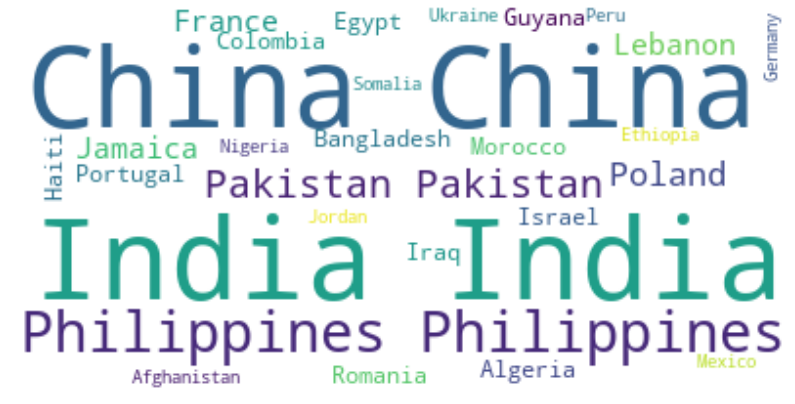

In [35]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<h1>SEABORN</h1>

In [36]:
import seaborn as sns
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


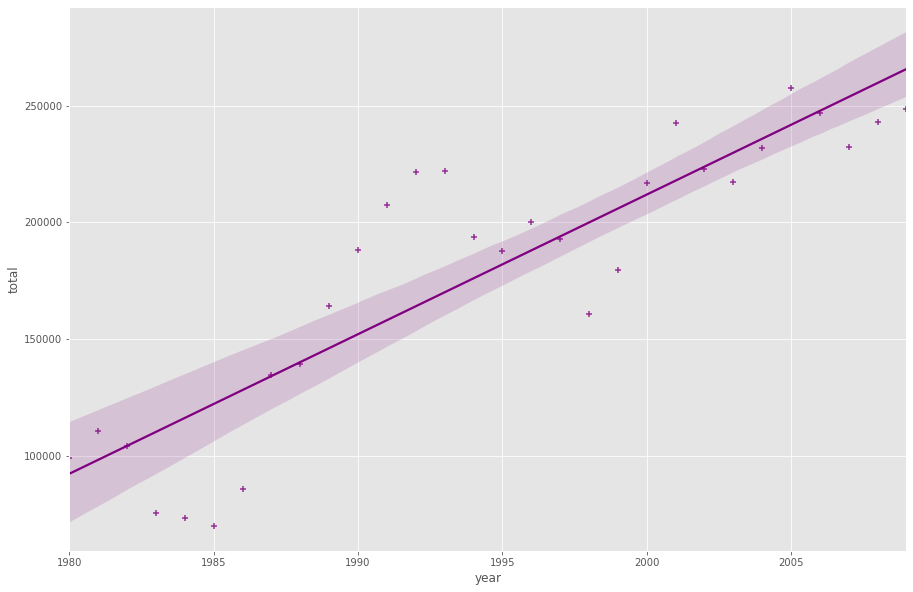

In [37]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', 
                 y='total', 
                 data=df_tot, 
                 color="purple",
                 marker='+'
                )

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

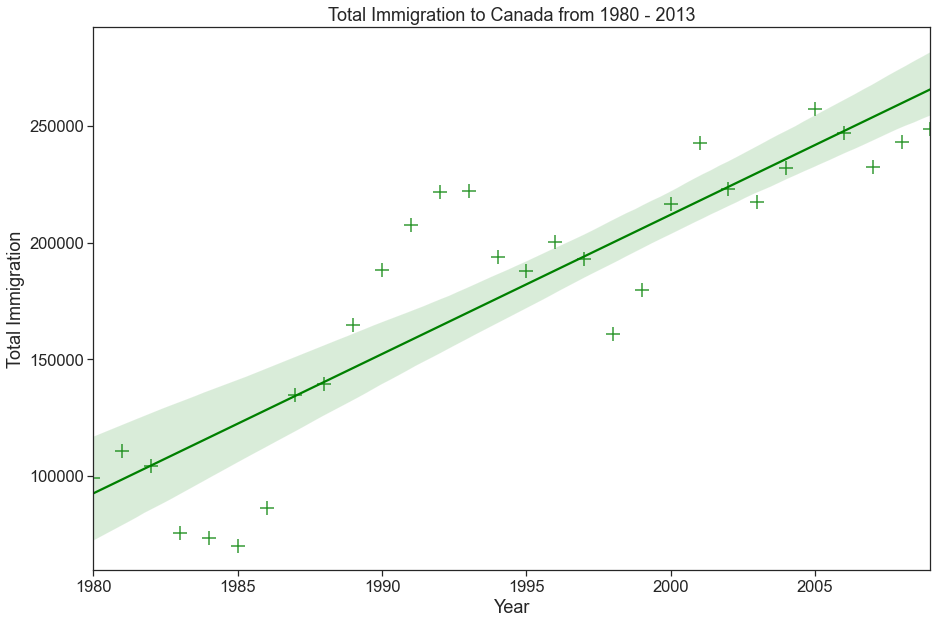

In [38]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks') 
# change background to white background
# whitegrid

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

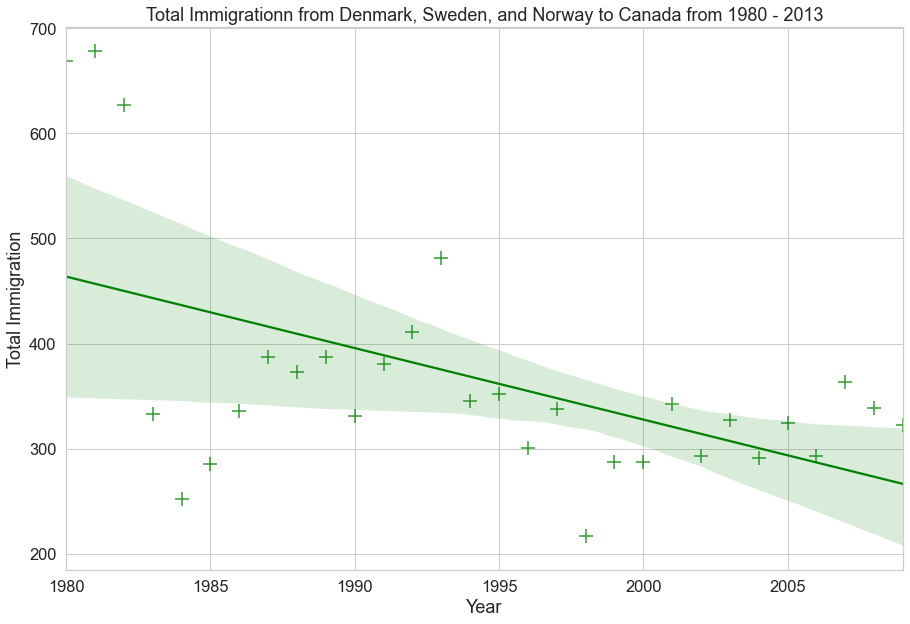

In [39]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')